In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D



# K-means Clustering

In [14]:
#loading the dataset
df = pd.read_csv('telco_churn.csv')
df.head()

# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

# Apply Min-Max scaling to 'tenure' and 'MonthlyCharges' columns
df[['tenure', 'MonthlyCharges']] = minmax.fit_transform(df[['tenure', 'MonthlyCharges']])

In [15]:
# Selection of the relevant columns for K-means Clustering model
X = df[['MonthlyCharges', 'tenure']]
# Initializing the KMeans Clustering Model.
# The cluster amount is 4 because we want to divide scatter diagram into 4 cluster groups for the customers. 
kmeans = KMeans(n_clusters=4, random_state=0)
# Fitting the model to the data
kmeans.fit(X)
# Getting the cluster assignments
labels = kmeans.labels_
# Addding the cluster assignments to the dataframe
df['cluster'] = labels

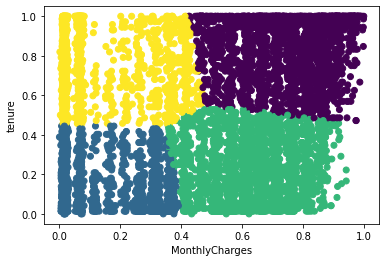

In [16]:
# Plotting the clusters into scatter diagram where x axis is monthly charges and y axis is tenure
plt.scatter(df['MonthlyCharges'], df['tenure'], c=df['cluster'])
plt.xlabel('MonthlyCharges')
plt.ylabel('tenure')
plt.show()

In [17]:
#Top left(yellow) of cluster graph means distribution customers who pay less but being a customer for a longer period
#Top right(purple) of cluster graph means distribution customers who pay more and being a customer for a longer period
#Bottom right(green) of cluster graph means distribution customers who pay more but being a customer for a shorter period
#Bottom left(blue) of cluster graph means distribution customers who pay less and being a customer for a shorter period

# Calculation of the number of data points in each cluster
cluster_counts = df['cluster'].value_counts()
# Calculation of the percentage of data in each cluster in total amount of data
cluster_percentages = cluster_counts / len(df) * 100
# Printing the percentages of the amount of data in each cluster in the total data
print(cluster_percentages)

2    31.818827
0    27.559279
1    24.265228
3    16.356666
Name: cluster, dtype: float64


In [18]:
# For each cluster number, calculation of ranges of tenure and monthly charges belong to each cluster
for cluster in df['cluster'].unique():
    # Selection of the data in the current cluster
    cluster_data = df[df['cluster'] == cluster]
    
    # Calculation of the range of 'monthly charges' and 'tenure'
    monthly_charges_range = cluster_data['MonthlyCharges'].min(), cluster_data['MonthlyCharges'].max()
    tenure_range = cluster_data['tenure'].min(), cluster_data['tenure'].max()
    
    # Printing the ranges to detect cluster locations in the scatter diagram
    print(f"Cluster {cluster}:")
    print(f"  Monthly Charges Range: {monthly_charges_range}")
    print(f"  Tenure Range: {tenure_range}")
    
    # After having the intervals for each cluster, we can detect which cluster is yellow/blue/green/purple in the scatter plot.
    # Cluster 1 is Blue cluster has 24.26% of customers in total
    # Cluster 2 is green cluster has 31.82% of customers in total
    # Cluster 3 is yellow cluster has 16.36% of customers in total
    # CLuster 0 is purple cluster has 27.56% of customers in total
    # So the amount of data in green>purple>blue>yellow so the insights gained are as below:
    # It is more likely to expect our customers are willing to pay high monthly charge (purple + green > yellow + blue) = (59.38 > 40.62)
    # Our customers are more tend to hold on their contracts for a shorter time. (Blue + green > purple + yellow) = (56.08 > 43.92)

Cluster 1:
  Monthly Charges Range: (0.0, 0.3910447761194029)
  Tenure Range: (0.0, 0.4444444444444444)
Cluster 2:
  Monthly Charges Range: (0.3577114427860697, 0.9422885572139305)
  Tenure Range: (0.0, 0.5277777777777778)
Cluster 3:
  Monthly Charges Range: (0.0014925373134328235, 0.46915422885572144)
  Tenure Range: (0.4444444444444444, 1.0)
Cluster 0:
  Monthly Charges Range: (0.4248756218905473, 0.9999999999999999)
  Tenure Range: (0.4722222222222222, 1.0)


# DBSCAN 

In [19]:
#Converting internetservice data from categorical to numerical
internetservicenum = {'DSL':2,'Fiber optic':1, 'No':0}
df.InternetService.replace(internetservicenum, inplace=True)

In [20]:
# Selection of the relevant columns
X = df[['MonthlyCharges', 'tenure', 'InternetService']]

# Initializing the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)
# Fitting the model to the data
dbscan.fit(X)
# Getting the cluster assignments
labels = dbscan.labels_

# Addding the cluster assignments to the dataframe
df['cluster'] = labels
# Printing the first few rows of the dataframe
print(df.head())
# Calculating the number of data points in each cluster
cluster_counts = df['cluster'].value_counts()
# Calculating the percentage of data in each cluster
cluster_percentages = cluster_counts / len(df) * 100

   customerID  gender  SeniorCitizen Partner Dependents    tenure  \
0  7590-VHVEG  Female              0     Yes         No  0.013889   
1  5575-GNVDE    Male              0      No         No  0.472222   
2  3668-QPYBK    Male              0      No         No  0.027778   
3  7795-CFOCW    Male              0      No         No  0.625000   
4  9237-HQITU  Female              0      No         No  0.027778   

  PhoneService     MultipleLines  InternetService OnlineSecurity  ...  \
0           No  No phone service                2             No  ...   
1          Yes                No                2            Yes  ...   
2          Yes                No                2            Yes  ...   
3           No  No phone service                2            Yes  ...   
4          Yes                No                1             No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month           

In [21]:
# Printing the amount percentages of each cluster in total amount of data
print(cluster_percentages)

1    43.958540
0    34.374556
2    21.666903
Name: cluster, dtype: float64


In [22]:
# Description of the intervals of each cluster for the variables in our model
for cluster in df['cluster'].unique():
    # Select the data in the current cluster
    cluster_data = df[df['cluster'] == cluster]
    # Calculate the range of 'monthly charges', 'tenure' and 'churn'
    monthly_charges_range = cluster_data['MonthlyCharges'].min(), cluster_data['MonthlyCharges'].max()
    tenure_range = cluster_data['tenure'].min(), cluster_data['tenure'].max()
    internetservice_range = cluster_data['InternetService'].min(), cluster_data['InternetService'].max()
    # Printing the ranges
    print(f"Cluster {cluster}:")
    print(f"  Monthly Charges Range: {monthly_charges_range}")
    print(f"  Tenure Range: {tenure_range}")
    print(f"  InternetService Range: {internetservice_range}")

Cluster 0:
  Monthly Charges Range: (0.05174129353233828, 0.7616915422885572)
  Tenure Range: (0.0, 1.0)
  InternetService Range: (2, 2)
Cluster 1:
  Monthly Charges Range: (0.4925373134328358, 0.9999999999999999)
  Tenure Range: (0.013888888888888888, 1.0)
  InternetService Range: (1, 1)
Cluster 2:
  Monthly Charges Range: (0.0, 0.0860696517412935)
  Tenure Range: (0.0, 1.0)
  InternetService Range: (0, 0)


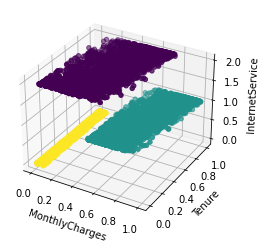

In [23]:
# Plotting the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MonthlyCharges'], df['tenure'], df['InternetService'], c=df['cluster'])
ax.set_xlabel('MonthlyCharges')
ax.set_ylabel('Tenure')
ax.set_zlabel('InternetService')
plt.show()

# Yellow: low monthly charges are No internet service users
# Purple: Moderate monthly charges are DSL users
# Green: High monthly charges are Fiber optic users
# By looking at the 3-dimensional plot, we gain the insight that tenure does not have any relationship with the type of internet service usage
# Also as it can be expected better technological functionality integrated packages require more monthly charge